In [1]:
import numpy as np
import pandas as pd

from datetime import datetime, date, time
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV
import graphviz
from joblib import Parallel, delayed

## for explainer
import shap



# set float display default
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

pd.set_option('display.max_colwidth', None)

In [2]:
dataset = pd.read_csv('covid_recoded_data.csv')


In [3]:
dataset['batch_date'] = pd.to_datetime(dataset['batch_date'])

In [4]:
dataset

gender                 age                         geography  \
0         Male  16 to 25 years old                             Rural   
1         Male  16 to 25 years old                             Rural   
2         Male  16 to 25 years old                             Rural   
3         Male  16 to 25 years old               Suburban/Peri-urban   
4         Male  16 to 25 years old                             Rural   
...        ...                 ...                               ...   
2864281   Male  16 to 25 years old                             Rural   
2864282   Male  16 to 25 years old  City center or metropolitan area   
2864283   Male  26 to 35 years old  City center or metropolitan area   
2864284   Male  36 to 45 years old  City center or metropolitan area   
2864285   Male  16 to 25 years old  City center or metropolitan area   

                                                                               financial_situation  \
0                                         I can afford food and regular expenses, but nothing else   
1        I can afford food and regular expenses, and buy new clothes once a year, but nothing else   
2                                         I can afford food and regular expenses, but nothing else   
3                                         I can afford food and regular expenses, but nothing else   
4                                                              I can afford food, but nothing else   
...                                                                                            ...   
2864281                                                  I cannot afford enough food for my family   
2864282                                                        I can afford food, but nothing else   
2864283  I can afford food and regular expenses, and buy new clothes once a year, but nothing else   
2864284                                                  I cannot afford enough food for my family   
2864285                                                  I cannot afford enough food for my family   

                     education   employment_status         ethnicity  \
0        College or university             Student   Fon and related   
1        College or university             Student             Other   
2        College or university  Employed part-time  Adja and related   
3        College or university             Student   Fon and related   
4        College or university             Student   Fon and related   
...                        ...                 ...               ...   
2864281  Secondary/high school       Self-employed           Bambara   
2864282  College or university             Student           Malinke   
2864283  College or university          Unemployed           Bambara   
2864284  College or university             Student           Bambara   
2864285  College or university             Student           Malinke   

               religion batch_date  observation_lat  observation_lon  \
0        Roman Catholic 2020-07-28             6.43             2.33   
1         Protestantism 2020-10-03             6.54             2.37   
2        Roman Catholic 2020-05-05             6.38             2.24   
3        Roman Catholic 2020-09-24             6.37             2.35   
4        Roman Catholic 2020-12-03             6.36             2.27   
...                 ...        ...              ...              ...   
2864281          Muslim 2020-10-12            12.61            -8.05   
2864282          Muslim 2020-07-28            12.60            -8.02   
2864283          Muslim 2020-08-25            12.58            -7.99   
2864284          Muslim 2020-06-02            12.62            -7.96   
2864285          Muslim 2020-05-26            12.60            -7.92   

        HASC_code L0_name     L1_name        L2_name intro_input  \
0        BJ.AQ.AC   Benin  Atlantique  Abomey-Calavi    Continue   
1        BJ.AQ.AC   Benin  Atlantique  Abomey-Calavi

In [5]:
ds = dataset.groupby('L0_name').resample("W", on='batch_date').mean().reset_index()

In [6]:
ds

L0_name batch_date  observation_lat  observation_lon  \
0     Afghanistan 2020-04-12            34.22            68.22   
1     Afghanistan 2020-04-19            34.30            67.75   
2     Afghanistan 2020-04-26            34.30            67.90   
3     Afghanistan 2020-05-03            34.28            67.86   
4     Afghanistan 2020-05-10            34.18            67.69   
...           ...        ...              ...              ...   
3738     Zimbabwe 2020-12-06           -18.99            30.03   
3739     Zimbabwe 2020-12-13           -19.12            29.88   
3740     Zimbabwe 2020-12-20           -19.13            29.91   
3741     Zimbabwe 2020-12-27           -19.13            29.93   
3742     Zimbabwe 2021-01-03           -19.04            29.92   

      how_concerned_are_you_about_the_spread_of_covid_19_in_your_community  \
0                                                                     4.36   
1                                                                     4.32   
2                                                                     4.29   
3                                                                     4.29   
4                                                                     4.28   
...                                                                    ...   
3738                                                                  4.30   
3739                                                                  4.37   
3740                                                                  4.33   
3741                                                                  4.33   
3742                                                                  4.31   

      how_satisfied_were_you_with_the_level_of_care_you_received  \
0                                                           1.34   
1                                                           1.32   
2                                                           1.39   
3                                                           1.34   
4                                                           1.32   
...                                                          ...   
3738                                                        1.81   
3739                                                        1.83   
3740                                                        1.70   
3741                                                        1.71   
3742                                                        1.40   

      how_confident_are_you_that_you_are_immune_should_a_"second_wave"_emerge_in_the_future  \
0                                                                                       nan   
1                                                                                       nan   
2                                                                                       nan   
3                                                                                      1.18   
4                                                                                      1.20   
...                                                                                     ...   
3738                                                                                   1.57   
3739                                                                                   1.45   
3740                                                                                   1.76   
3741                                                                                   1.51   
3742                                                                                   1.52   

      how_concerned_are_you_that_you_personally_will_contract_covid_19  \
0                                                                 3.33   
1                                                                 3.55   
2                                                                 3.56   
3                         

In [7]:
ds.isnull().sum()

L0_name                                                                                                                                                                                                                                                        0
batch_date                                                                                                                                                                                                                                                     0
observation_lat                                                                                                                                                                                                                                               16
observation_lon                                                                                                                                                                                                                      

In [8]:
dataset2 = pd.read_csv('covid_cases_by_country_by_week.csv')

In [9]:
dataset2['Last_Update'] = pd.to_datetime(dataset2['Last_Update'])

In [10]:
dataset2.drop(columns='Unnamed: 0', inplace=True)
dataset2

Country_Region Last_Update  Confirmed   Deaths  Recovered   Active  \
0       Afghanistan  2020-04-12       3050   104.00     175.00  2765.00   
1       Afghanistan  2020-04-19       5845   197.00     511.00  5135.00   
2       Afghanistan  2020-04-26       7328   242.00    1006.00  6137.00   
3       Afghanistan  2020-05-03      13894   434.00    1808.00 11739.00   
4       Afghanistan  2020-05-10      23605   704.00    3063.00 19821.00   
...             ...         ...        ...      ...        ...      ...   
9320       Zimbabwe  2021-02-14     243868  9537.00  205655.00 28676.00   
9321       Zimbabwe  2021-02-21     248153  9924.00  219843.00 18386.00   
9322       Zimbabwe  2021-02-28     251624 10165.00  226623.00 14836.00   
9323       Zimbabwe  2021-03-07     253262 10333.00  233148.00  9781.00   
9324       Zimbabwe  2021-03-14     218022  8938.00  203546.00  5538.00   

      Confirmed_new  Deaths_new  Recovered_new  Active_new  
0            184.00        3.00          14.00      166.00  
1            389.00       14.00          99.00      275.00  
2            408.00       14.00          44.00      308.00  
3           1006.00       25.00         143.00      838.00  
4           1572.00       43.00         171.00     1350.00  
...             ...         ...            ...         ...  
9320         617.00       82.00        1706.00    -1171.00  
9321         664.00       34.00        2007.00    -1377.00  
9322         290.00       31.00         494.00     -235.00  
9323         202.00       22.00        1215.00    -1035.00  
9324         163.00       11.00         191.00      -39.00  

[9325 rows x 10 columns]

## Add columns of new cases next week

In [11]:
df = dataset2.copy()

In [12]:
df['Pre_week'] = df['Last_Update'] - timedelta(weeks=1)

In [13]:
df = df[['Country_Region', 'Confirmed_new', 'Deaths_new','Recovered_new','Active_new', 'Pre_week']]
df.rename(columns={'Confirmed_new':'Confirmed_next', 'Deaths_new':'Deaths_next','Recovered_new':'Recovered_next','Active_new':'Active_next'}, inplace=True)
df

Country_Region  Confirmed_next  Deaths_next  Recovered_next  Active_next  \
0       Afghanistan          184.00         3.00           14.00       166.00   
1       Afghanistan          389.00        14.00           99.00       275.00   
2       Afghanistan          408.00        14.00           44.00       308.00   
3       Afghanistan         1006.00        25.00          143.00       838.00   
4       Afghanistan         1572.00        43.00          171.00      1350.00   
...             ...             ...          ...             ...          ...   
9320       Zimbabwe          617.00        82.00         1706.00     -1171.00   
9321       Zimbabwe          664.00        34.00         2007.00     -1377.00   
9322       Zimbabwe          290.00        31.00          494.00      -235.00   
9323       Zimbabwe          202.00        22.00         1215.00     -1035.00   
9324       Zimbabwe          163.00        11.00          191.00       -39.00   

       Pre_week  
0    2020-04-05  
1    2020-04-12  
2    2020-04-19  
3    2020-04-26  
4    2020-05-03  
...         ...  
9320 2021-02-07  
9321 2021-02-14  
9322 2021-02-21  
9323 2021-02-28  
9324 2021-03-07  

[9325 rows x 6 columns]

In [14]:
dataset2 = pd.merge(dataset2, df, left_on=['Country_Region','Last_Update'], right_on=['Country_Region','Pre_week'], how='left')
dataset2.drop(columns=['Pre_week'], inplace=True)
dataset2

Country_Region Last_Update  Confirmed   Deaths  Recovered   Active  \
0       Afghanistan  2020-04-12       3050   104.00     175.00  2765.00   
1       Afghanistan  2020-04-19       5845   197.00     511.00  5135.00   
2       Afghanistan  2020-04-26       7328   242.00    1006.00  6137.00   
3       Afghanistan  2020-05-03      13894   434.00    1808.00 11739.00   
4       Afghanistan  2020-05-10      23605   704.00    3063.00 19821.00   
...             ...         ...        ...      ...        ...      ...   
9320       Zimbabwe  2021-02-14     243868  9537.00  205655.00 28676.00   
9321       Zimbabwe  2021-02-21     248153  9924.00  219843.00 18386.00   
9322       Zimbabwe  2021-02-28     251624 10165.00  226623.00 14836.00   
9323       Zimbabwe  2021-03-07     253262 10333.00  233148.00  9781.00   
9324       Zimbabwe  2021-03-14     218022  8938.00  203546.00  5538.00   

      Confirmed_new  Deaths_new  Recovered_new  Active_new  Confirmed_next  \
0            184.00        3.00          14.00      166.00          389.00   
1            389.00       14.00          99.00      275.00          408.00   
2            408.00       14.00          44.00      308.00         1006.00   
3           1006.00       25.00         143.00      838.00         1572.00   
4           1572.00       43.00         171.00     1350.00         2361.00   
...             ...         ...            ...         ...             ...   
9320         617.00       82.00        1706.00    -1171.00          664.00   
9321         664.00       34.00        2007.00    -1377.00          290.00   
9322         290.00       31.00         494.00     -235.00          202.00   
9323         202.00       22.00        1215.00    -1035.00          163.00   
9324         163.00       11.00         191.00      -39.00             nan   

      Deaths_next  Recovered_next  Active_next  
0           14.00           99.00       275.00  
1           14.00           44.00       308.00  
2           25.00          143.00       838.00  
3           43.00          171.00      1350.00  
4           53.00          243.00      2073.00  
...           ...             ...          ...  
9320        34.00         2007.00     -1377.00  
9321        31.00          494.00      -235.00  
9322        22.00         1215.00     -1035.00  
9323        11.00          191.00       -39.00  
9324          nan             nan          nan  

[9325 rows x 14 columns]

In [15]:
ts_df = pd.merge(ds, dataset2, left_on=['L0_name','batch_date'], right_on=['Country_Region','Last_Update'], how='left')

In [16]:
ts_df.drop(columns=['Country_Region','Last_Update','observation_lat','observation_lon'], inplace=True)

In [17]:
ts_df

L0_name batch_date  \
0     Afghanistan 2020-04-12   
1     Afghanistan 2020-04-19   
2     Afghanistan 2020-04-26   
3     Afghanistan 2020-05-03   
4     Afghanistan 2020-05-10   
...           ...        ...   
3738     Zimbabwe 2020-12-06   
3739     Zimbabwe 2020-12-13   
3740     Zimbabwe 2020-12-20   
3741     Zimbabwe 2020-12-27   
3742     Zimbabwe 2021-01-03   

      how_concerned_are_you_about_the_spread_of_covid_19_in_your_community  \
0                                                                     4.36   
1                                                                     4.32   
2                                                                     4.29   
3                                                                     4.29   
4                                                                     4.28   
...                                                                    ...   
3738                                                                  4.30   
3739                                                                  4.37   
3740                                                                  4.33   
3741                                                                  4.33   
3742                                                                  4.31   

      how_satisfied_were_you_with_the_level_of_care_you_received  \
0                                                           1.34   
1                                                           1.32   
2                                                           1.39   
3                                                           1.34   
4                                                           1.32   
...                                                          ...   
3738                                                        1.81   
3739                                                        1.83   
3740                                                        1.70   
3741                                                        1.71   
3742                                                        1.40   

      how_confident_are_you_that_you_are_immune_should_a_"second_wave"_emerge_in_the_future  \
0                                                                                       nan   
1                                                                                       nan   
2                                                                                       nan   
3                                                                                      1.18   
4                                                                                      1.20   
...                                                                                     ...   
3738                                                                                   1.57   
3739                                                                                   1.45   
3740                                                                                   1.76   
3741                                                                                   1.51   
3742                                                                                   1.52   

      how_concerned_are_you_that_you_personally_will_contract_covid_19  \
0                                                                 3.33   
1                                                                 3.55   
2                                                                 3.56   
3                                                                 3.67   
4                                                                 3.61   
...                                                                ...   
3738                                                              4.26   
3739                                                              4.29   
3740                                                            

# Generate log dvs

In [18]:
ts_df['Confirmed_new_log'] = np.log(ts_df['Confirmed_new'] + 1)
ts_df['Deaths_new_log'] = np.log(ts_df['Deaths_new'] + 1)
ts_df['Recovered_new_log'] = np.log(ts_df['Recovered_new'] + 1)
ts_df['Active_new_log'] = np.log(ts_df['Active_new'] + 1)

ts_df['Confirmed_next_log'] = np.log(ts_df['Confirmed_next'] + 1)
ts_df['Deaths_next_log'] = np.log(ts_df['Deaths_next'] + 1)
ts_df['Recovered_next_log'] = np.log(ts_df['Recovered_next'] + 1)
ts_df['Active_next_log'] = np.log(ts_df['Active_next'] + 1)


invalid value encountered in log
divide by zero encountered in log


In [19]:
ts_df

L0_name batch_date  \
0     Afghanistan 2020-04-12   
1     Afghanistan 2020-04-19   
2     Afghanistan 2020-04-26   
3     Afghanistan 2020-05-03   
4     Afghanistan 2020-05-10   
...           ...        ...   
3738     Zimbabwe 2020-12-06   
3739     Zimbabwe 2020-12-13   
3740     Zimbabwe 2020-12-20   
3741     Zimbabwe 2020-12-27   
3742     Zimbabwe 2021-01-03   

      how_concerned_are_you_about_the_spread_of_covid_19_in_your_community  \
0                                                                     4.36   
1                                                                     4.32   
2                                                                     4.29   
3                                                                     4.29   
4                                                                     4.28   
...                                                                    ...   
3738                                                                  4.30   
3739                                                                  4.37   
3740                                                                  4.33   
3741                                                                  4.33   
3742                                                                  4.31   

      how_satisfied_were_you_with_the_level_of_care_you_received  \
0                                                           1.34   
1                                                           1.32   
2                                                           1.39   
3                                                           1.34   
4                                                           1.32   
...                                                          ...   
3738                                                        1.81   
3739                                                        1.83   
3740                                                        1.70   
3741                                                        1.71   
3742                                                        1.40   

      how_confident_are_you_that_you_are_immune_should_a_"second_wave"_emerge_in_the_future  \
0                                                                                       nan   
1                                                                                       nan   
2                                                                                       nan   
3                                                                                      1.18   
4                                                                                      1.20   
...                                                                                     ...   
3738                                                                                   1.57   
3739                                                                                   1.45   
3740                                                                                   1.76   
3741                                                                                   1.51   
3742                                                                                   1.52   

      how_concerned_are_you_that_you_personally_will_contract_covid_19  \
0                                                                 3.33   
1                                                                 3.55   
2                                                                 3.56   
3                                                                 3.67   
4                                                                 3.61   
...                                                                ...   
3738                                                              4.26   
3739                                                              4.29   
3740                                                            

In [20]:
ts_df.isnull().sum()

L0_name                                                                                                                                                                                                                                                        0
batch_date                                                                                                                                                                                                                                                     0
how_concerned_are_you_about_the_spread_of_covid_19_in_your_community                                                                                                                                                                                          16
how_satisfied_were_you_with_the_level_of_care_you_received                                                                                                                                                                           

### Save data

In [21]:
ts_df.to_csv("weekly_survey_and_covid_cases.csv", index=False)

## DV1: Confirmed_new_log

In [22]:
#drop rows missing dependent variable.
data= ts_df[~ts_df['Confirmed_new_log'].isnull()]

In [23]:
data

L0_name batch_date  \
0     Afghanistan 2020-04-12   
1     Afghanistan 2020-04-19   
2     Afghanistan 2020-04-26   
3     Afghanistan 2020-05-03   
4     Afghanistan 2020-05-10   
...           ...        ...   
3738     Zimbabwe 2020-12-06   
3739     Zimbabwe 2020-12-13   
3740     Zimbabwe 2020-12-20   
3741     Zimbabwe 2020-12-27   
3742     Zimbabwe 2021-01-03   

      how_concerned_are_you_about_the_spread_of_covid_19_in_your_community  \
0                                                                     4.36   
1                                                                     4.32   
2                                                                     4.29   
3                                                                     4.29   
4                                                                     4.28   
...                                                                    ...   
3738                                                                  4.30   
3739                                                                  4.37   
3740                                                                  4.33   
3741                                                                  4.33   
3742                                                                  4.31   

      how_satisfied_were_you_with_the_level_of_care_you_received  \
0                                                           1.34   
1                                                           1.32   
2                                                           1.39   
3                                                           1.34   
4                                                           1.32   
...                                                          ...   
3738                                                        1.81   
3739                                                        1.83   
3740                                                        1.70   
3741                                                        1.71   
3742                                                        1.40   

      how_confident_are_you_that_you_are_immune_should_a_"second_wave"_emerge_in_the_future  \
0                                                                                       nan   
1                                                                                       nan   
2                                                                                       nan   
3                                                                                      1.18   
4                                                                                      1.20   
...                                                                                     ...   
3738                                                                                   1.57   
3739                                                                                   1.45   
3740                                                                                   1.76   
3741                                                                                   1.51   
3742                                                                                   1.52   

      how_concerned_are_you_that_you_personally_will_contract_covid_19  \
0                                                                 3.33   
1                                                                 3.55   
2                                                                 3.56   
3                                                                 3.67   
4                                                                 3.61   
...                                                                ...   
3738                                                              4.26   
3739                                                              4.29   
3740                                                            

In [24]:
data.isnull().sum()

L0_name                                                                                                                                                                                                                                                        0
batch_date                                                                                                                                                                                                                                                     0
how_concerned_are_you_about_the_spread_of_covid_19_in_your_community                                                                                                                                                                                          16
how_satisfied_were_you_with_the_level_of_care_you_received                                                                                                                                                                           

In [25]:
data.fillna(data.mean(), inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
data.isnull().sum()

L0_name                                                                                                                                                                                                                                                     0
batch_date                                                                                                                                                                                                                                                  0
how_concerned_are_you_about_the_spread_of_covid_19_in_your_community                                                                                                                                                                                        0
how_satisfied_were_you_with_the_level_of_care_you_received                                                                                                                                                                                    

In [27]:
data['Confirmed_new_log'].describe()

count   3696.00
mean       7.12
std        2.76
min        0.00
25%        5.16
50%        7.46
75%        9.02
max       14.24
Name: Confirmed_new_log, dtype: float64

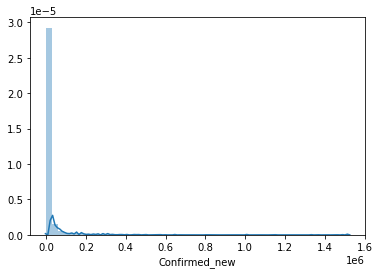

In [28]:
sns.distplot(data['Confirmed_new'])

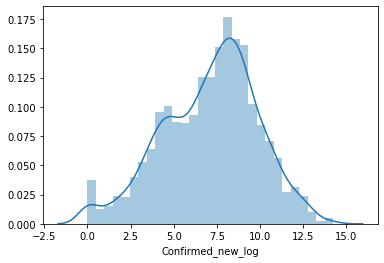

In [29]:
sns.distplot(data['Confirmed_new_log'])

In [30]:
X = data.iloc[:, 2:-20]
y = data['Confirmed_new_log']

In [31]:
X

how_concerned_are_you_about_the_spread_of_covid_19_in_your_community  \
0                                                                     4.36   
1                                                                     4.32   
2                                                                     4.29   
3                                                                     4.29   
4                                                                     4.28   
...                                                                    ...   
3738                                                                  4.30   
3739                                                                  4.37   
3740                                                                  4.33   
3741                                                                  4.33   
3742                                                                  4.31   

      how_satisfied_were_you_with_the_level_of_care_you_received  \
0                                                           1.34   
1                                                           1.32   
2                                                           1.39   
3                                                           1.34   
4                                                           1.32   
...                                                          ...   
3738                                                        1.81   
3739                                                        1.83   
3740                                                        1.70   
3741                                                        1.71   
3742                                                        1.40   

      how_confident_are_you_that_you_are_immune_should_a_"second_wave"_emerge_in_the_future  \
0                                                                                      1.38   
1                                                                                      1.38   
2                                                                                      1.38   
3                                                                                      1.18   
4                                                                                      1.20   
...                                                                                     ...   
3738                                                                                   1.57   
3739                                                                                   1.45   
3740                                                                                   1.76   
3741                                                                                   1.51   
3742                                                                                   1.52   

      how_concerned_are_you_that_you_personally_will_contract_covid_19  \
0                                                                 3.33   
1                                                                 3.55   
2                                                                 3.56   
3                                                                 3.67   
4                                                                 3.61   
...                                                                ...   
3738                                                              4.26   
3739                                                              4.29   
3740                                                              4.27   
3741                                                              4.25   
3742                                                              4.22   

      how_concerned_are_you_about_your_access_to_adequate_health_care_services_should_you_contract_covid_19  \
0                                                                                                      3.75   


In [32]:
y

0      5.22
1      5.97
2      6.01
3      6.91
4      7.36
       ... 
3738   6.68
3739   6.40
3740   6.84
3741   6.70
3742   7.33
Name: Confirmed_new_log, Length: 3696, dtype: float64

# Split train and test

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
X_train

how_concerned_are_you_about_the_spread_of_covid_19_in_your_community  \
1302                                                                  4.14   
2453                                                                  4.27   
428                                                                   3.66   
1045                                                                  3.89   
1718                                                                  4.41   
...                                                                    ...   
836                                                                   4.26   
3309                                                                  4.18   
1656                                                                  3.98   
2649                                                                  4.00   
2774                                                                  3.43   

      how_satisfied_were_you_with_the_level_of_care_you_received  \
1302                                                        1.27   
2453                                                        1.23   
428                                                         1.39   
1045                                                        1.40   
1718                                                        1.33   
...                                                          ...   
836                                                         1.48   
3309                                                        1.93   
1656                                                        1.39   
2649                                                        1.00   
2774                                                        1.00   

      how_confident_are_you_that_you_are_immune_should_a_"second_wave"_emerge_in_the_future  \
1302                                                                                   1.17   
2453                                                                                   1.20   
428                                                                                    2.00   
1045                                                                                   1.21   
1718                                                                                   1.00   
...                                                                                     ...   
836                                                                                    1.39   
3309                                                                                   2.03   
1656                                                                                   1.38   
2649                                                                                   1.00   
2774                                                                                   1.00   

      how_concerned_are_you_that_you_personally_will_contract_covid_19  \
1302                                                              3.87   
2453                                                              4.18   
428                                                               3.96   
1045                                                              3.66   
1718                                                              4.18   
...                                                                ...   
836                                                               4.15   
3309                                                              3.98   
1656                                                              3.89   
2649                                                              3.80   
2774                                                              3.09   

      how_concerned_are_you_about_your_access_to_adequate_health_care_services_should_you_contract_covid_19  \
1302                                                                                                   3.99   


# Random Forest

In [35]:
RF = RandomForestRegressor(n_estimators = 200, random_state = 0)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.820726802398866

In [36]:
preds = RF.predict(X_test)
rmse = mean_squared_error(y_test, preds, squared=True)
rmse

1.3763488573343987

## Importance

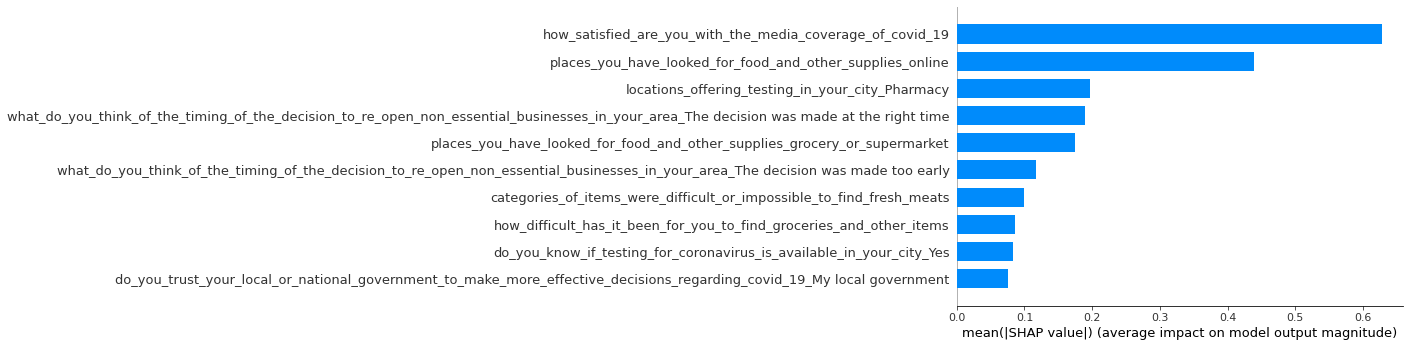

In [37]:
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=10)

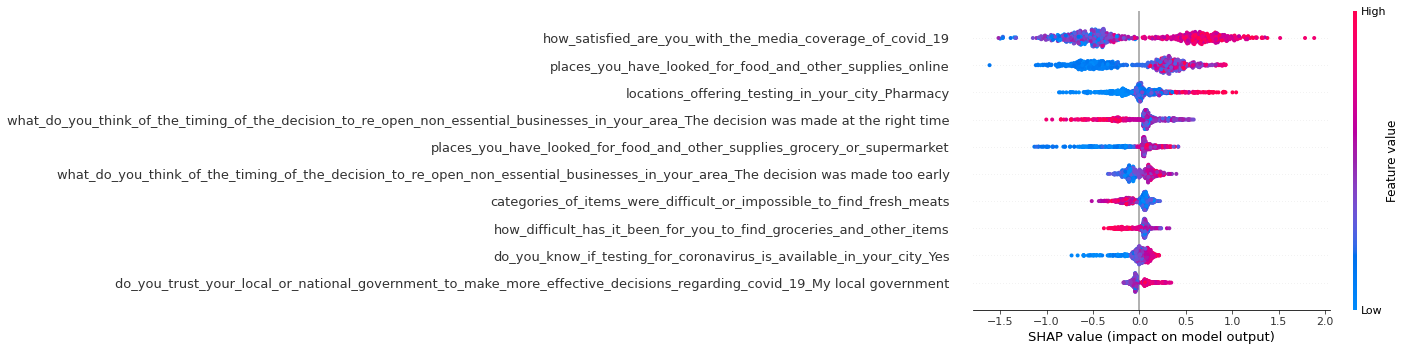

In [38]:
shap.summary_plot(shap_values, X_test,max_display=10)

# XGBoost

In [39]:
XG = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bynode = 0.5, colsample_bylevel=0.5, learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 200, gamma=0.5)

In [40]:
XG.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=0.5, colsample_bytree=1, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
XG.score(X_test, y_test)

0.8385082440701679

In [42]:
preds= XG.predict(X_test)
rmse= mean_squared_error(y_test, preds, squared=True)
rmse

1.2398339334442934

In [43]:
#explainer = shap.TreeExplainer(XG)
#shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=10)

In [44]:
#shap.summary_plot(shap_values, X_test,max_display=10)

## Tuning parameters

xgb1 = xgb.XGBRegressor()
parameters = {'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [1, 2, 4],
              'subsample': [0.7, 0.9],
               'gamma':[0, 0.5],
              'colsample_bylevel': [0.5, 0.7],
              'colsample_bynode': [0.5, 0.7],
              'n_estimators': [100, 200, 500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [45]:
best_params = {'colsample_bylevel': 0.7, 'colsample_bynode': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7}

In [46]:
XG2 = xgb.XGBRegressor(objective ='reg:squarederror',**best_params)
XG2.fit(X_train, y_train) 
XG2.score(X_test, y_test) #best model

0.86677886886161

In [47]:
preds= XG2.predict(X_test)
rmse= mean_squared_error(y_test, preds, squared=True)
rmse

1.0227895417087118

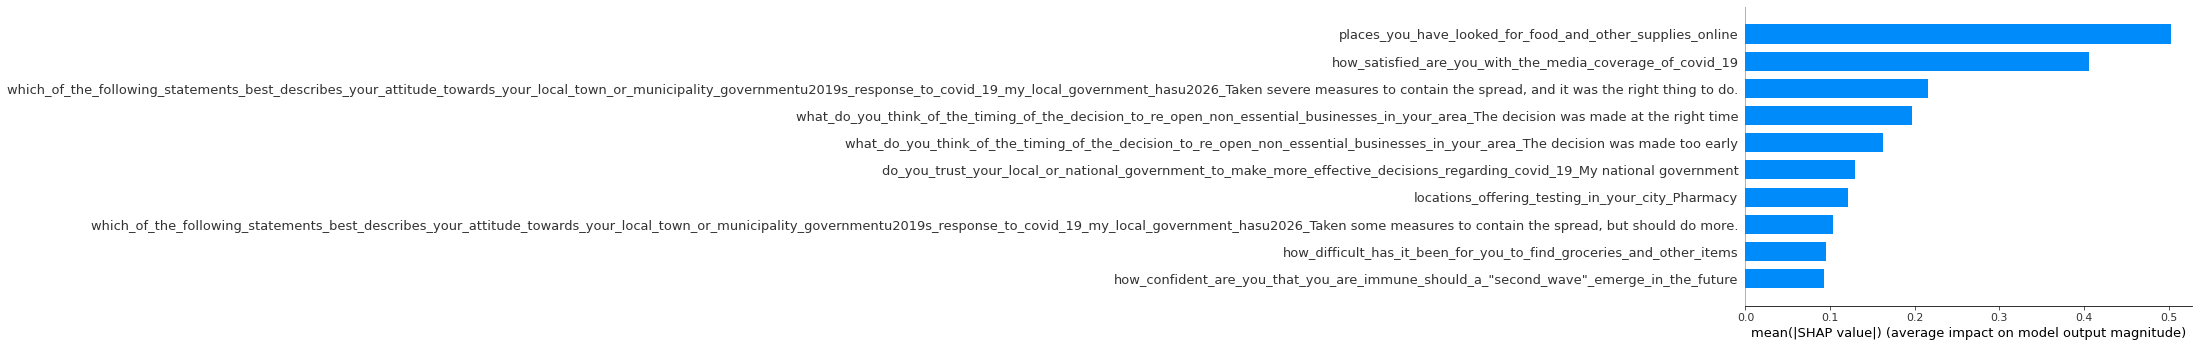

In [48]:
explainer = shap.TreeExplainer(XG2)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=10)

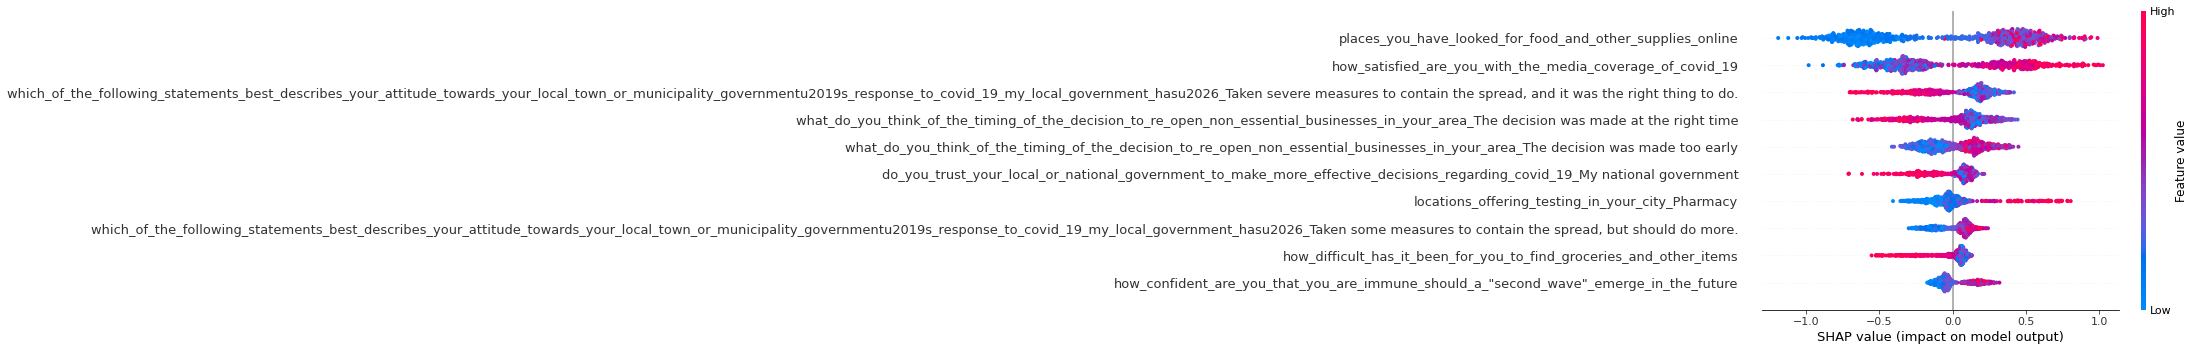

In [49]:
shap.summary_plot(shap_values, X_test, max_display=10)

# DV2: Confirmed_next_log

In [50]:
#drop rows missing dependent variable.
data= ts_df[~ts_df['Confirmed_next_log'].isnull()]
data

L0_name batch_date  \
0     Afghanistan 2020-04-12   
1     Afghanistan 2020-04-19   
2     Afghanistan 2020-04-26   
3     Afghanistan 2020-05-03   
4     Afghanistan 2020-05-10   
...           ...        ...   
3738     Zimbabwe 2020-12-06   
3739     Zimbabwe 2020-12-13   
3740     Zimbabwe 2020-12-20   
3741     Zimbabwe 2020-12-27   
3742     Zimbabwe 2021-01-03   

      how_concerned_are_you_about_the_spread_of_covid_19_in_your_community  \
0                                                                     4.36   
1                                                                     4.32   
2                                                                     4.29   
3                                                                     4.29   
4                                                                     4.28   
...                                                                    ...   
3738                                                                  4.30   
3739                                                                  4.37   
3740                                                                  4.33   
3741                                                                  4.33   
3742                                                                  4.31   

      how_satisfied_were_you_with_the_level_of_care_you_received  \
0                                                           1.34   
1                                                           1.32   
2                                                           1.39   
3                                                           1.34   
4                                                           1.32   
...                                                          ...   
3738                                                        1.81   
3739                                                        1.83   
3740                                                        1.70   
3741                                                        1.71   
3742                                                        1.40   

      how_confident_are_you_that_you_are_immune_should_a_"second_wave"_emerge_in_the_future  \
0                                                                                       nan   
1                                                                                       nan   
2                                                                                       nan   
3                                                                                      1.18   
4                                                                                      1.20   
...                                                                                     ...   
3738                                                                                   1.57   
3739                                                                                   1.45   
3740                                                                                   1.76   
3741                                                                                   1.51   
3742                                                                                   1.52   

      how_concerned_are_you_that_you_personally_will_contract_covid_19  \
0                                                                 3.33   
1                                                                 3.55   
2                                                                 3.56   
3                                                                 3.67   
4                                                                 3.61   
...                                                                ...   
3738                                                              4.26   
3739                                                              4.29   
3740                                                            

In [51]:
data.fillna(data.mean(), inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [52]:
data['Confirmed_next_log'].describe()

count   3696.00
mean       7.18
std        2.77
min        0.00
25%        5.21
50%        7.54
75%        9.07
max       14.36
Name: Confirmed_next_log, dtype: float64

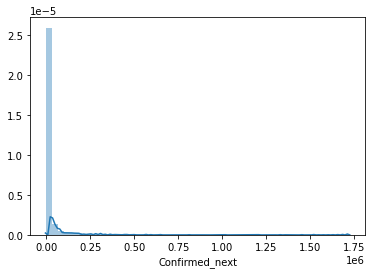

In [53]:
sns.distplot(data['Confirmed_next'])

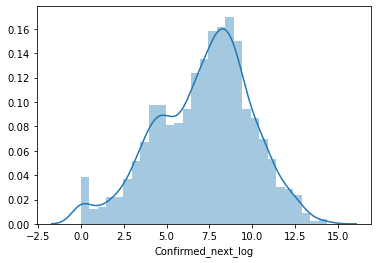

In [54]:
sns.distplot(data['Confirmed_next_log'])

In [55]:
X = data.iloc[:, 2:-20]
y = data['Confirmed_next_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Random Forest

In [56]:
RF = RandomForestRegressor(n_estimators = 200, random_state = 0)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.8150229121634913

In [57]:
preds = RF.predict(X_test)
rmse = mean_squared_error(y_test, preds, squared=True)
rmse

1.4175930180589886

### Importance

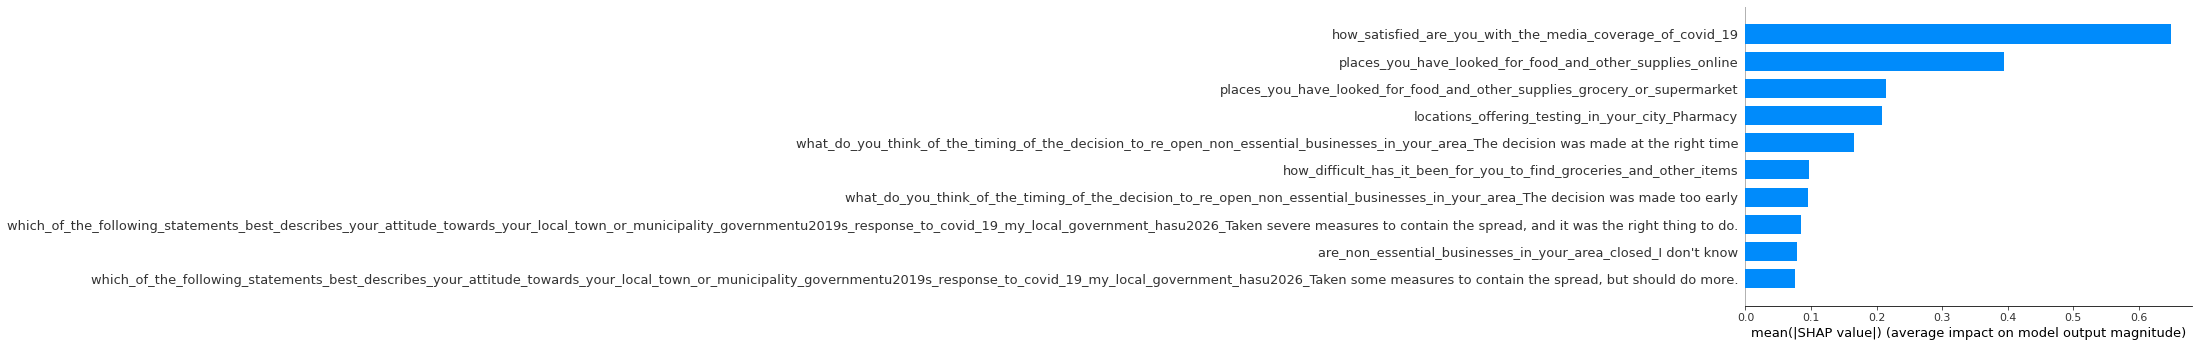

In [58]:
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=10)

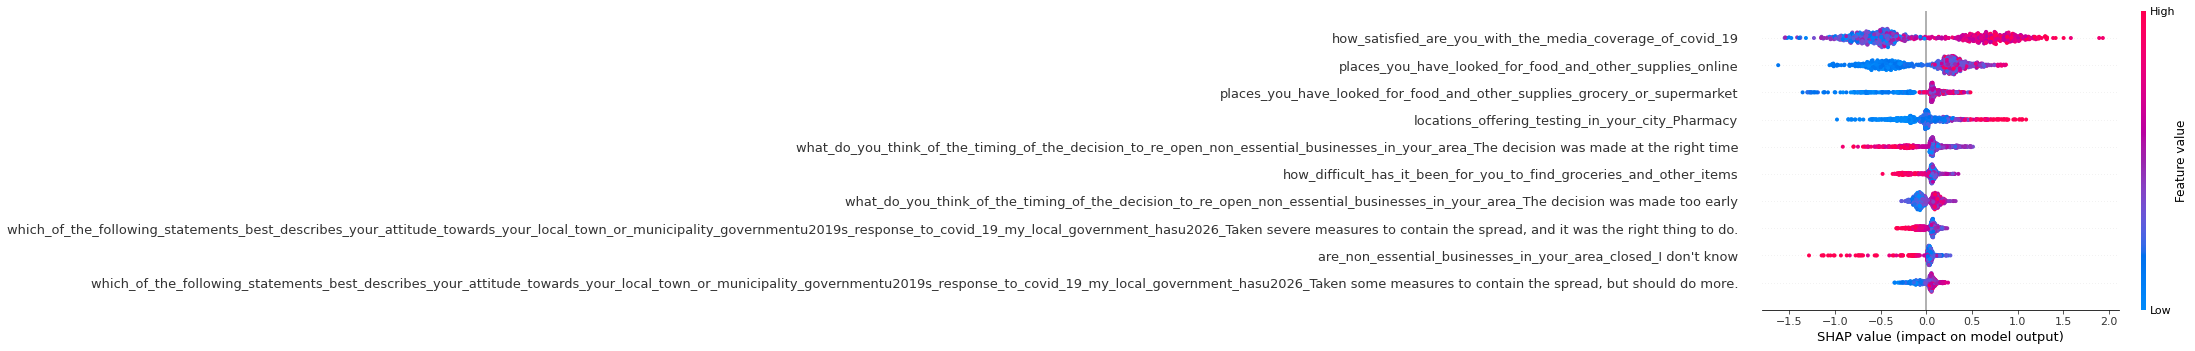

In [59]:
shap.summary_plot(shap_values, X_test,max_display=10)

## XGBoost

In [60]:
XG = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bynode = 0.5, colsample_bylevel=0.5, learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 200, gamma=0.5)
XG.fit(X_train,y_train)
XG.score(X_test, y_test)

0.8239600301946101

In [61]:
preds= XG.predict(X_test)
rmse= mean_squared_error(y_test, preds, squared=True)
rmse

1.3491023943246554

In [62]:
best_params = {'colsample_bylevel': 0.7, 'colsample_bynode': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7}

In [63]:
XG2 = xgb.XGBRegressor(objective ='reg:squarederror',**best_params)
XG2.fit(X_train, y_train) 
XG2.score(X_test, y_test) 

0.8630243331617571

In [64]:
preds= XG2.predict(X_test)
rmse= mean_squared_error(y_test, preds, squared=True)
rmse

1.049728651396484

### Importance

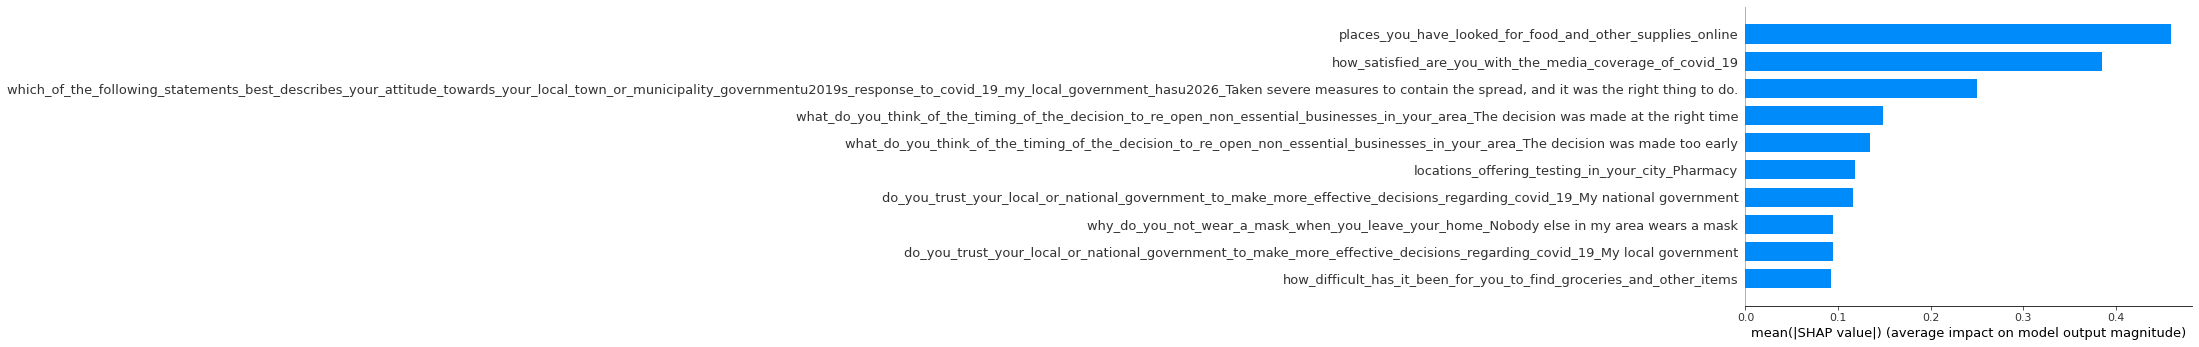

In [65]:
explainer = shap.TreeExplainer(XG2)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=10)

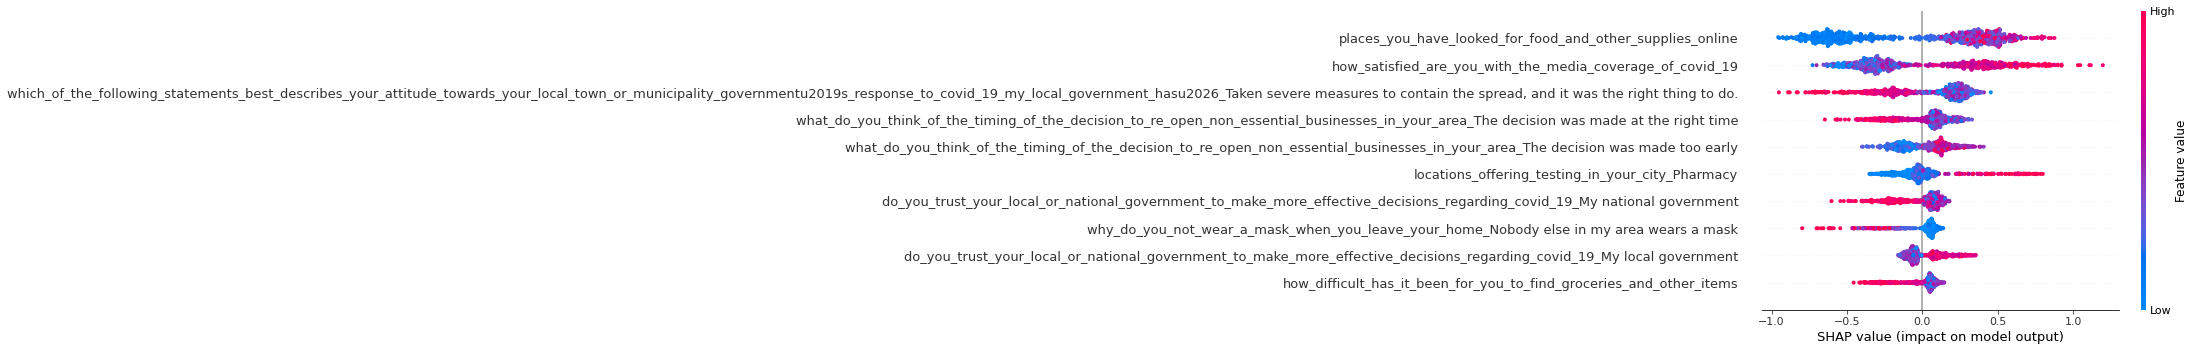

In [66]:
shap.summary_plot(shap_values, X_test, max_display=10)

# DV3: Deaths_new_log

In [67]:
#drop rows missing dependent variable.
data= ts_df[~ts_df['Deaths_new_log'].isnull()]
data= data[data['Deaths_new_log']!= float("-inf")]
data

L0_name batch_date  \
0     Afghanistan 2020-04-12   
1     Afghanistan 2020-04-19   
2     Afghanistan 2020-04-26   
3     Afghanistan 2020-05-03   
4     Afghanistan 2020-05-10   
...           ...        ...   
3738     Zimbabwe 2020-12-06   
3739     Zimbabwe 2020-12-13   
3740     Zimbabwe 2020-12-20   
3741     Zimbabwe 2020-12-27   
3742     Zimbabwe 2021-01-03   

      how_concerned_are_you_about_the_spread_of_covid_19_in_your_community  \
0                                                                     4.36   
1                                                                     4.32   
2                                                                     4.29   
3                                                                     4.29   
4                                                                     4.28   
...                                                                    ...   
3738                                                                  4.30   
3739                                                                  4.37   
3740                                                                  4.33   
3741                                                                  4.33   
3742                                                                  4.31   

      how_satisfied_were_you_with_the_level_of_care_you_received  \
0                                                           1.34   
1                                                           1.32   
2                                                           1.39   
3                                                           1.34   
4                                                           1.32   
...                                                          ...   
3738                                                        1.81   
3739                                                        1.83   
3740                                                        1.70   
3741                                                        1.71   
3742                                                        1.40   

      how_confident_are_you_that_you_are_immune_should_a_"second_wave"_emerge_in_the_future  \
0                                                                                       nan   
1                                                                                       nan   
2                                                                                       nan   
3                                                                                      1.18   
4                                                                                      1.20   
...                                                                                     ...   
3738                                                                                   1.57   
3739                                                                                   1.45   
3740                                                                                   1.76   
3741                                                                                   1.51   
3742                                                                                   1.52   

      how_concerned_are_you_that_you_personally_will_contract_covid_19  \
0                                                                 3.33   
1                                                                 3.55   
2                                                                 3.56   
3                                                                 3.67   
4                                                                 3.61   
...                                                                ...   
3738                                                              4.26   
3739                                                              4.29   
3740                                                            

In [68]:
data.fillna(data.mean(), inplace=True)

In [69]:
data['Deaths_new_log'].describe()

count   3694.00
mean       3.40
std        2.44
min        0.00
25%        1.39
50%        3.30
75%        5.14
max        9.86
Name: Deaths_new_log, dtype: float64

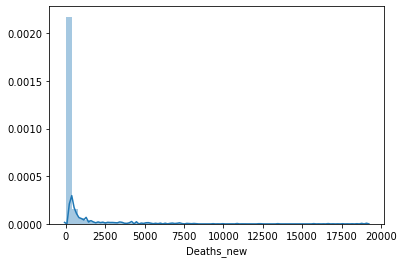

In [70]:
sns.distplot(data['Deaths_new'])

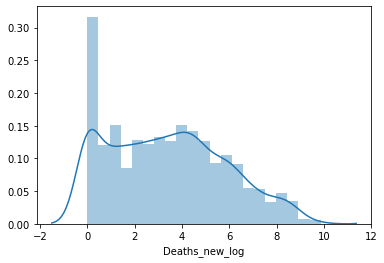

In [71]:
sns.distplot(data['Deaths_new_log'])

In [72]:
X = data.iloc[:, 2:-20]
y = data['Deaths_new_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Random Forest

In [73]:
RF = RandomForestRegressor(n_estimators = 200, random_state = 0)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.7719348547715372

In [74]:
preds = RF.predict(X_test)
rmse = mean_squared_error(y_test, preds, squared=True)
rmse

1.4060600897911364

### Importance

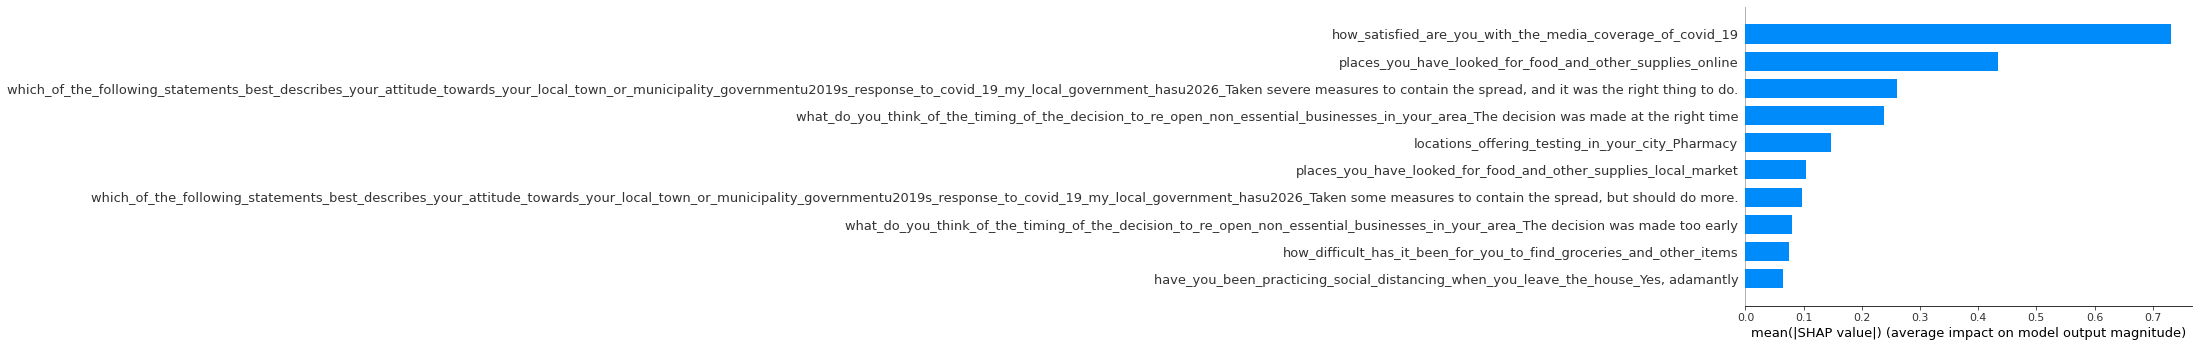

In [75]:
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10)

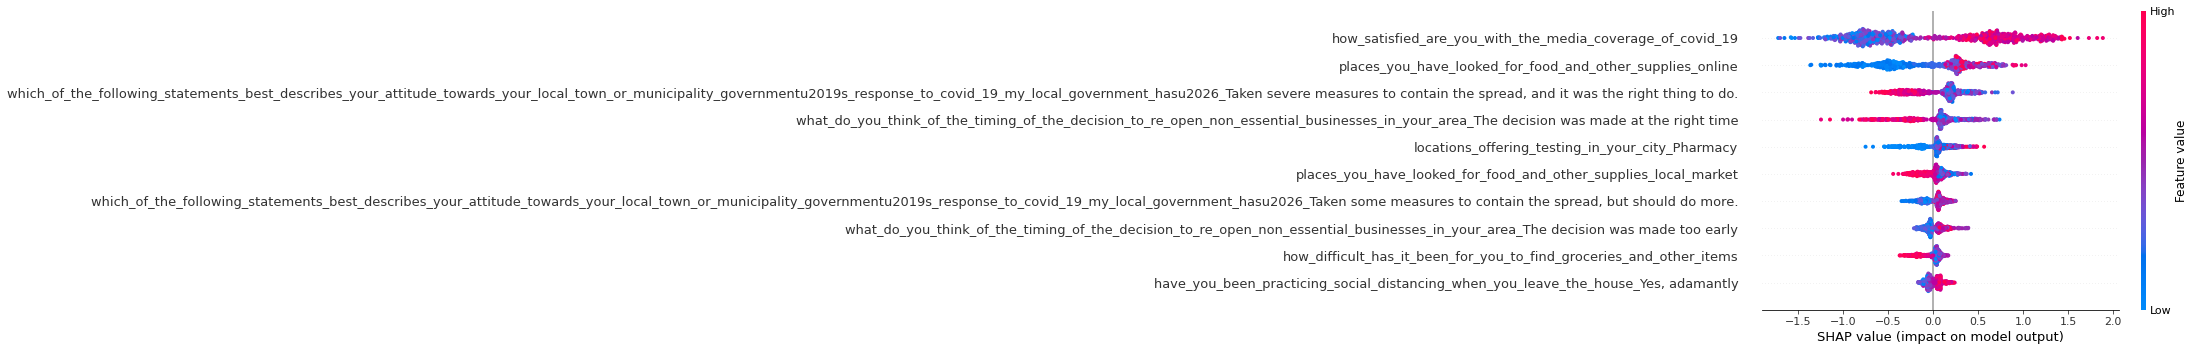

In [76]:
shap.summary_plot(shap_values, X_test,max_display=10)

## XGBoost

In [77]:
XG = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bynode = 0.5, colsample_bylevel=0.5, learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 200, gamma=0.5)
XG.fit(X_train,y_train)
XG.score(X_test, y_test)

0.8067483725433385

In [78]:
preds= XG.predict(X_test)
rmse= mean_squared_error(y_test, preds, squared=True)
rmse

1.1914288804709703

In [79]:
best_params = {'colsample_bylevel': 0.7, 'colsample_bynode': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7}

In [80]:
XG2 = xgb.XGBRegressor(objective ='reg:squarederror',**best_params)
XG2.fit(X_train, y_train) 
XG2.score(X_test, y_test) 

0.8353852427865667

In [81]:
preds= XG2.predict(X_test)
rmse= mean_squared_error(y_test, preds, squared=True)
rmse

1.0148777450258974

### Importance

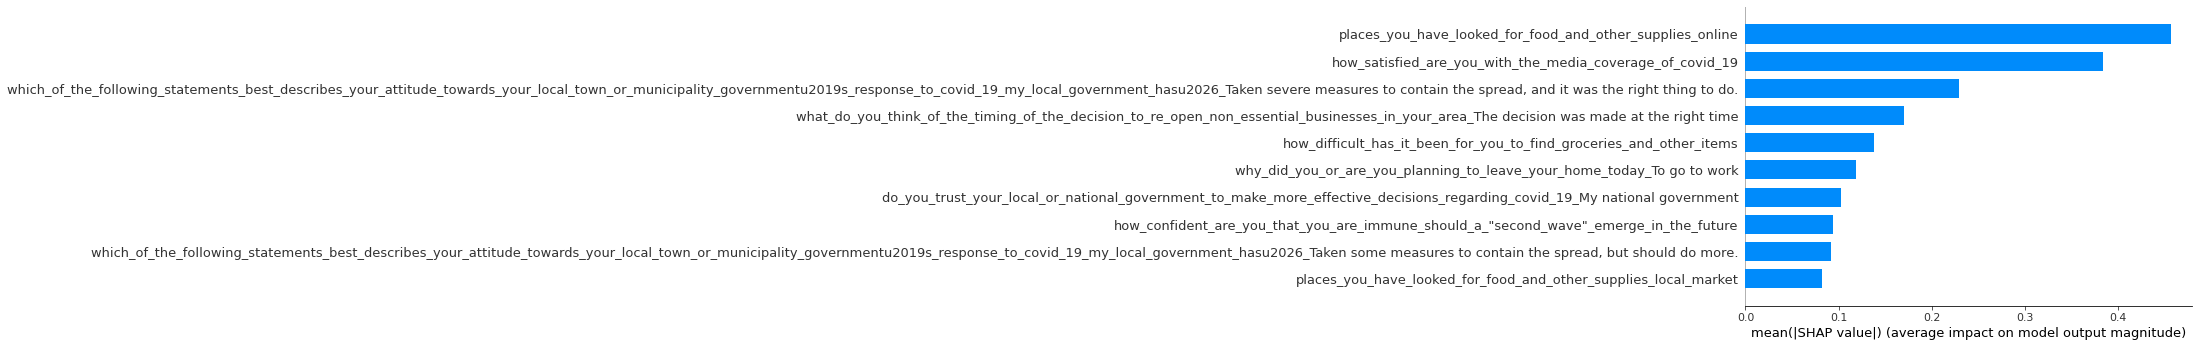

In [82]:
explainer = shap.TreeExplainer(XG2)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=10)

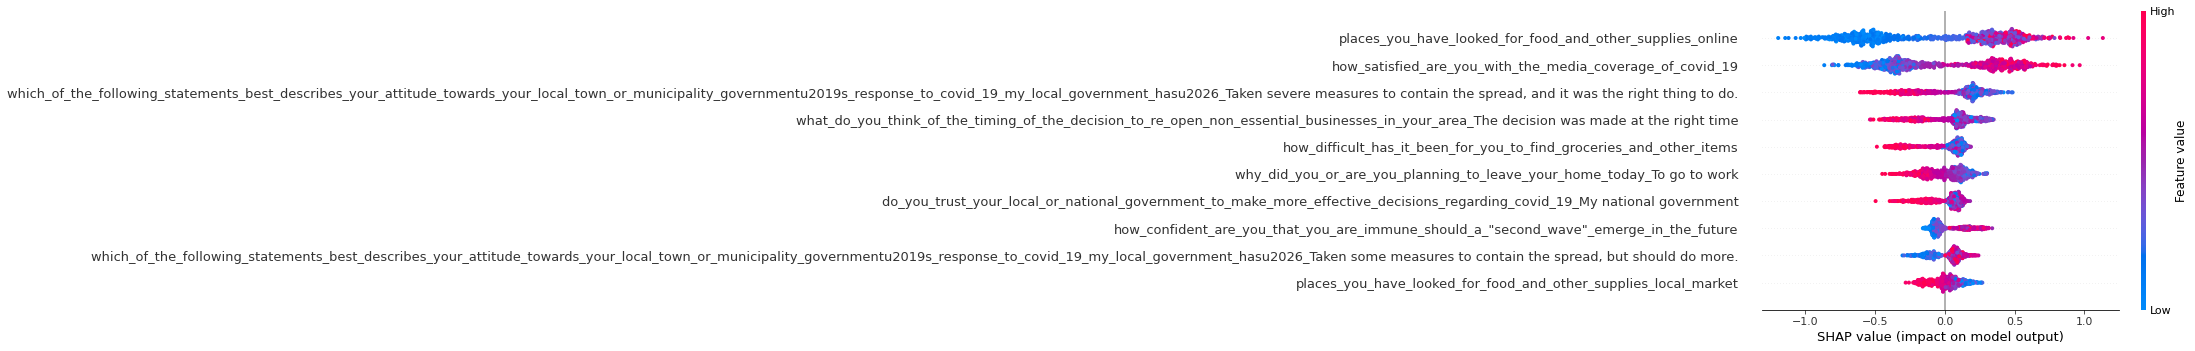

In [83]:
shap.summary_plot(shap_values, X_test, max_display=10)

# DV4: Deaths_next_log

In [84]:
#drop rows missing dependent variable.
data= ts_df[~ts_df['Deaths_next_log'].isnull()]
data= data[data['Deaths_next_log']!= float("-inf")]
data

L0_name batch_date  \
0     Afghanistan 2020-04-12   
1     Afghanistan 2020-04-19   
2     Afghanistan 2020-04-26   
3     Afghanistan 2020-05-03   
4     Afghanistan 2020-05-10   
...           ...        ...   
3738     Zimbabwe 2020-12-06   
3739     Zimbabwe 2020-12-13   
3740     Zimbabwe 2020-12-20   
3741     Zimbabwe 2020-12-27   
3742     Zimbabwe 2021-01-03   

      how_concerned_are_you_about_the_spread_of_covid_19_in_your_community  \
0                                                                     4.36   
1                                                                     4.32   
2                                                                     4.29   
3                                                                     4.29   
4                                                                     4.28   
...                                                                    ...   
3738                                                                  4.30   
3739                                                                  4.37   
3740                                                                  4.33   
3741                                                                  4.33   
3742                                                                  4.31   

      how_satisfied_were_you_with_the_level_of_care_you_received  \
0                                                           1.34   
1                                                           1.32   
2                                                           1.39   
3                                                           1.34   
4                                                           1.32   
...                                                          ...   
3738                                                        1.81   
3739                                                        1.83   
3740                                                        1.70   
3741                                                        1.71   
3742                                                        1.40   

      how_confident_are_you_that_you_are_immune_should_a_"second_wave"_emerge_in_the_future  \
0                                                                                       nan   
1                                                                                       nan   
2                                                                                       nan   
3                                                                                      1.18   
4                                                                                      1.20   
...                                                                                     ...   
3738                                                                                   1.57   
3739                                                                                   1.45   
3740                                                                                   1.76   
3741                                                                                   1.51   
3742                                                                                   1.52   

      how_concerned_are_you_that_you_personally_will_contract_covid_19  \
0                                                                 3.33   
1                                                                 3.55   
2                                                                 3.56   
3                                                                 3.67   
4                                                                 3.61   
...                                                                ...   
3738                                                              4.26   
3739                                                              4.29   
3740                                                            

In [85]:
data.fillna(data.mean(), inplace=True)

In [86]:
data['Deaths_next_log'].describe()

count   3694.00
mean       3.44
std        2.45
min        0.00
25%        1.39
50%        3.37
75%        5.21
max       10.02
Name: Deaths_next_log, dtype: float64

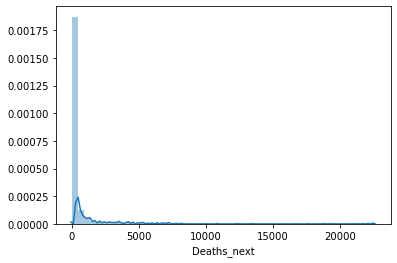

In [87]:
sns.distplot(data['Deaths_next'])

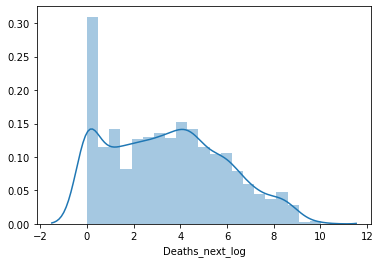

In [88]:
sns.distplot(data['Deaths_next_log'])

In [89]:
X = data.iloc[:, 2:-20]
y = data['Deaths_next_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Random Forest

In [90]:
RF = RandomForestRegressor(n_estimators = 200, random_state = 0)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.7741418351857098

In [91]:
preds = RF.predict(X_test)
rmse = mean_squared_error(y_test, preds, squared=True)
rmse

1.4171150337461105

### Importance

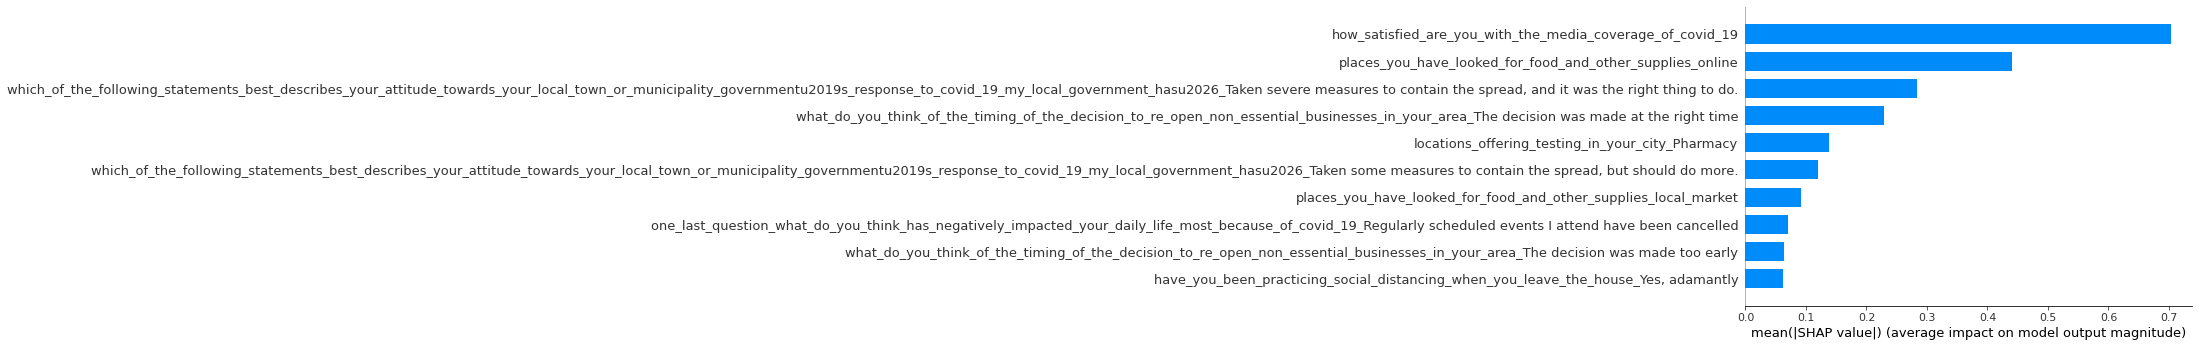

In [92]:
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=10)

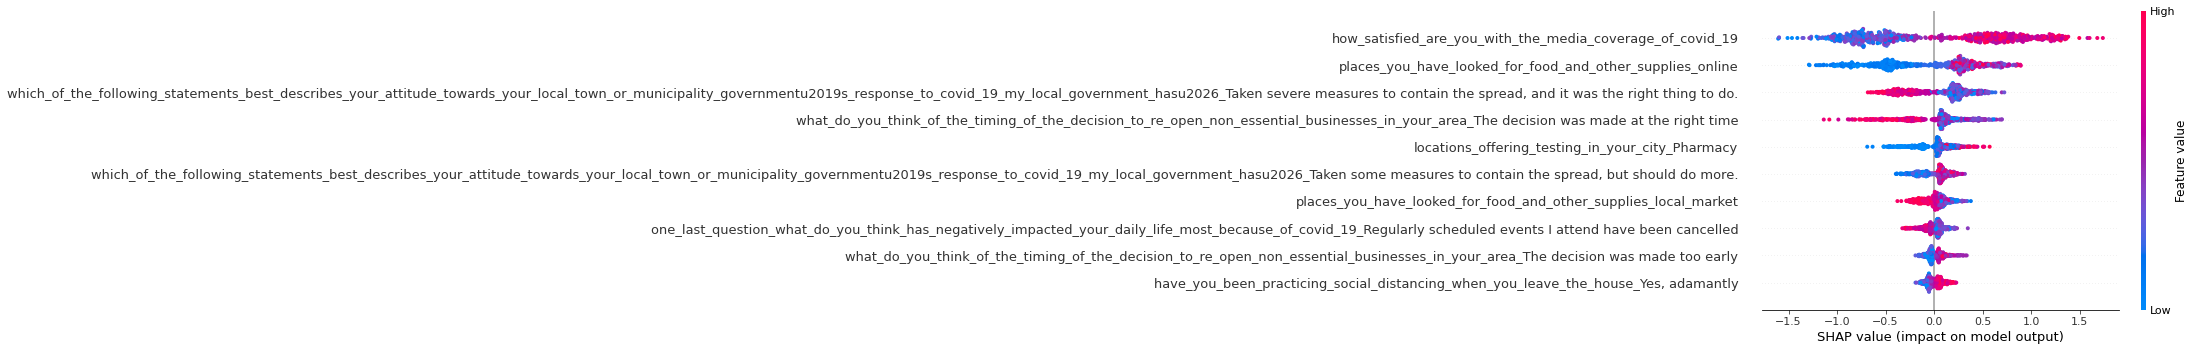

In [93]:
shap.summary_plot(shap_values, X_test,max_display=10)

## XGBoost

In [94]:
XG = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bynode = 0.5, colsample_bylevel=0.5, learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 200, gamma=0.5)
XG.fit(X_train,y_train)
XG.score(X_test, y_test)

0.8000725346450526

In [95]:
preds= XG.predict(X_test)
rmse= mean_squared_error(y_test, preds, squared=True)
rmse

1.2544165363523967

In [96]:
best_params = {'colsample_bylevel': 0.7, 'colsample_bynode': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7}

In [97]:
XG2 = xgb.XGBRegressor(objective ='reg:squarederror',**best_params)
XG2.fit(X_train, y_train) 
XG2.score(X_test, y_test) 

0.8379650410871472

In [98]:
preds= XG2.predict(X_test)
rmse= mean_squared_error(y_test, preds, squared=True)
rmse

1.0166653769485892

### Importance

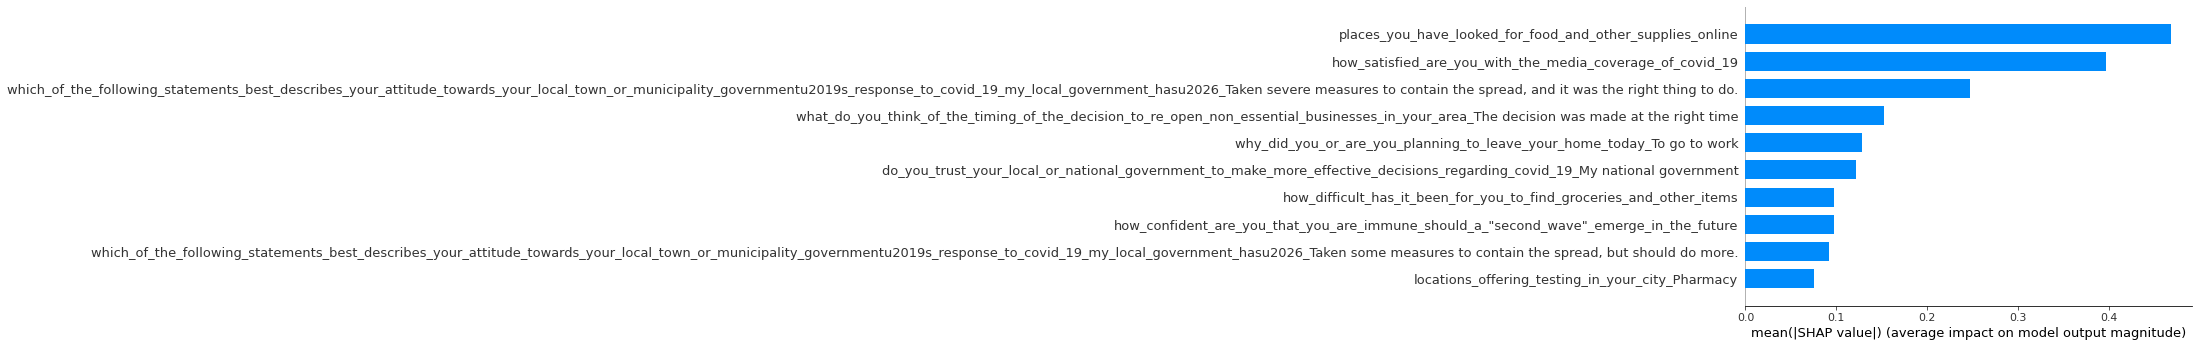

In [99]:
explainer = shap.TreeExplainer(XG2)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=10)

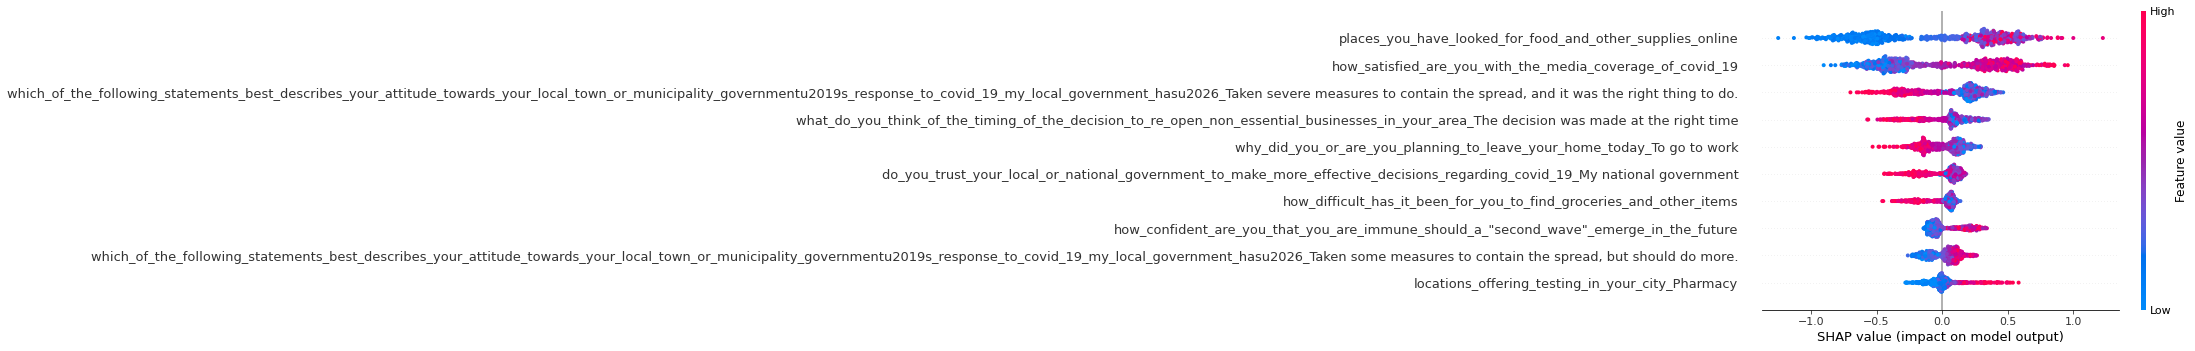

In [100]:
shap.summary_plot(shap_values, X_test, max_display=10)